# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio



## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	**Clasificación de imágenes.**
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 


**CLASE 8:** 
12/10/2021
    
archivos necesarios para la notebook: 'campo.png', 'daisy.jpg'   

# Clasificación 

La clasificación consiste en la asignación de una categoría a un objeto/individuo (o a varios) .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos (o características) tenemos de estos y 
* cuáles (o cuántas) serían las (posibles) categorias o clases.

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento. 
Cuando no se tiene en claro cuáles son las clases y no hay datos etiquetados y se quiere encontar los grupos/clases que emergen de los datos se llama **clasificación no supervisada**, análisis de conglomerados o clustering (en inglés).  
Cuando se tienen algunos datos clasificadas y muchos no clasificadas y se los considera en la clasificación se llama **clasificación semisupervisada**


## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección de zonas)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

### Clasificación dentro de una imagen $\leftrightarrow $ Segmentación (en computer vision)
Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles.

En esta notebook veremos **Clasificación supervisada dentro de una imagen**, nosotros etiquetaremos algunos pixeles, generaremos las muestras de entrenamiento.

¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

Cada pixel tiene un vector de datos o características, puede tener: 

- una: en imágenes monocromas, un dato/característica por pixel, por ejemplo: la intensidad, temperatura (en imágenes termográficas), coeficiente de absorción (en imágenes radiológicas), altitud (en imágenes DEM, modelo de elevación digital), etc.
- tres: en imágenes RGB, por ejemplo, intensidad del rojo, del verde y del azul. 
- dos o más (características/datos) según el tipo de imágenes, puede tener varios canales, imágenes satelitales por ejemplo.

**Ejemplo:** imágenes a color RGB

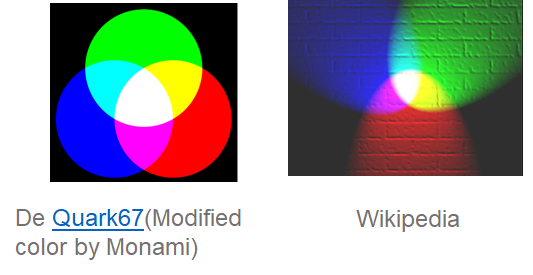

El **espacio de características** es el espacio donde viven los datos , en este caso:

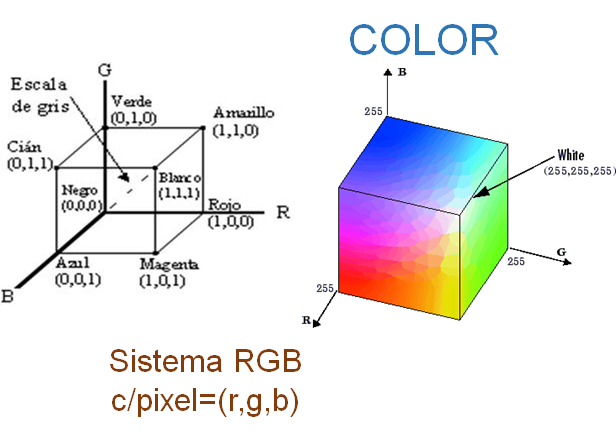

## Librerías necesarias

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

dimensiones de la imagen:  (354, 364, 3) es decir:  128856 = 354 x 364  pixeles RGB
tipo de datos:  uint8


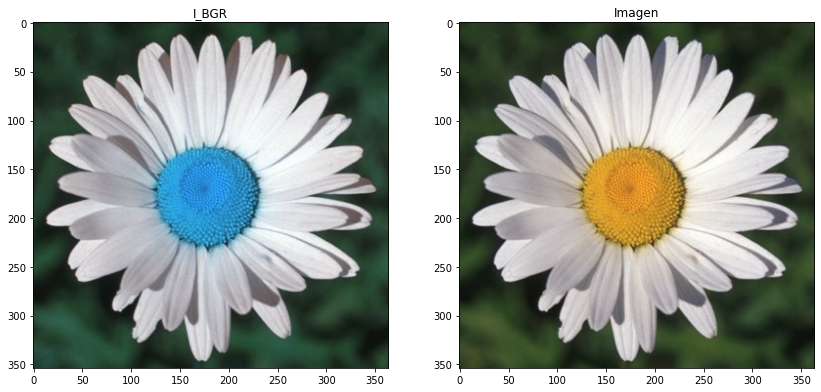

In [4]:
I_BGR = cv2.imread('pics/daisy.jpg')    # numpy-array of shape (N, M); dtype=np.uint8
imagen = cv2.cvtColor(I_BGR,cv2.COLOR_BGR2RGB) #recordemos que cv2_imread lee BGR
print('dimensiones de la imagen: ', imagen.shape, 'es decir: ', imagen.shape[0]*imagen.shape[1], '=', imagen.shape[0],'x',imagen.shape[1],' pixeles RGB')
print('tipo de datos: ', imagen.dtype)

fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.subplot(121),plt.imshow(I_BGR),plt.title('I_BGR') #solo para que veamos que si no cambiamos canales muestra canales BGR
plt.subplot(122),plt.imshow(imagen),plt.title('Imagen')

plt.show()


**Pasemos los pixeles a Dataframe**

Tabla de datos con un pixel por fila, en nuestro caso desarmamos la espacialidad, se pierde la ubicación del pixel en la imagen

In [5]:
dims=imagen.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c #con nro va tomando pixel por pixel siguiendo un orde lexicografico de primero filas y luego columnas
        data0[nro,0]=nro #pone ese contador de pixeles en el prime lugar
        data0[nro,1:4]=imagen[f,c,:] #en los 3 lugares restante pone el datos RGB del pixel "nro"
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
print('el tipo de data0 es', type(data0),'el tipo de df es', type(df))
df.head() #nos muestra las primeras 5 filas de la tabla
      

Tamaño de Base de pixeles: (128856, 4)
el tipo de data0 es <class 'numpy.ndarray'> el tipo de df es <class 'pandas.core.frame.DataFrame'>


pixel_id  rojo  verde  azul
0         0    34     42    27
1         1    35     43    28
2         2    33     44    28
3         3    34     45    29
4         4    33     46    28

In [6]:
df.tail() #nos muestra las últimas 5 filas de la tabla

pixel_id  rojo  verde  azul
128851    128851    47     71    39
128852    128852    45     69    37
128853    128853    45     69    37
128854    128854    45     69    37
128855    128855    45     69    37

Ahora vamos a visualizar cada dato de la tabla en un *scatter plot o diagrama de dispersión* (grafico de coordenadas cartesianas) donde mostramos los datos de a 2 de sus variables RGB.

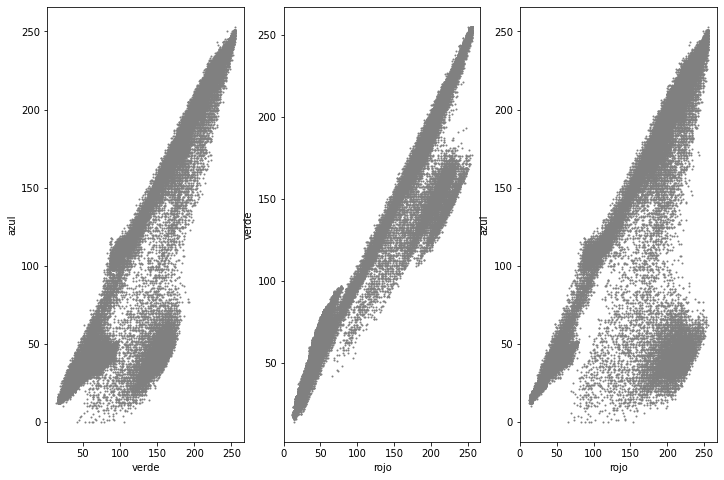

In [7]:
variables=["rojo","verde","azul"]# variables o características

variable0=variables[0] # puede ser 0, 1 o 2, es decir, rojo, verde o azul
variable1=variables[1] 
variable2=variables[2]

f0 = df[variable0].values
f1 = df[variable1].values
f2 = df[variable2].values



#plt.scatter(f0, f1,c='gray', s=1)
#plt.xlabel(variable0)
#plt.ylabel(variable1)

#plt.scatter(f0, f2,c='gray', s=1)
#plt.xlabel(variable0)
#plt.ylabel(variable2)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.subplot(131),plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)


plt.subplot(132),plt.scatter(f0, f1,c='gray', s=1)
plt.xlabel(variable0)
plt.ylabel(variable1)

plt.subplot(133),plt.scatter(f0, f2,c='gray', s=1)
plt.xlabel(variable0)
plt.ylabel(variable2)

plt.show()

Ahora **Scatter plot** interactivo, recorra el espacio, cada punto es un pixel en el espacio (r,g,b), graficamos de a dos variables: r y g por ejemplo

In [8]:
import plotly.express as px

fig = px.scatter(df, y=variable2, x=variable1, text="pixel_id")
fig.update_traces(marker_size=2)
#fig.show() #en Jupyter
fig.show(renderer="colab") #En Colab

Ahora en 3 dimensiones: R, G y B

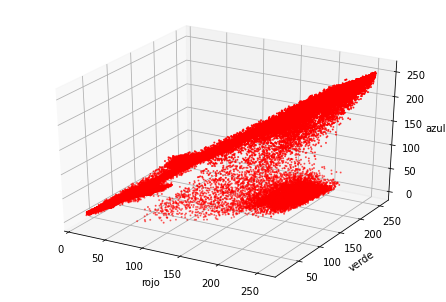

In [9]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='red', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

**Clustering** k-Medias (No supervisado), agrupa pixeles *parecidos* (en RGB, cercanos) en k grupos 

(k es la cantidad de grupos/clusters, un hiper parámetro del algoritmo, que tenemos que fijar)

Agrupa los datos tratando de separar muestras en k grupos de varianza igual, minimizando un criterio conocido como *inercia*.


$$\sum_{i=0}^{n}min_{\mu_j \in C }\left \|  x_i -\mu_j\right \|$$


https://scikit-learn.org/stable/modules/clustering.html#k-means

In [10]:
from sklearn.cluster import KMeans
# Número de clusters buscado:
n_clust = 3
df_km = pd.DataFrame(data0[:,1:4], columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust) #aqui le damos el modelo
km.fit(df_km) #aqui entrenamos utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
print(clusters.shape, clusters.dtype)
#print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

(128856,) int32


In [11]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters)
plt.colorbar()
plt.title('Imagen "Tri"-naria: 0, 1 o 2')
plt.show()
print('encontró 3 clases/clusters porque forzamos la cantidad')
print('en cada lugar tengo un dato, a que clase pertenece ese pixel: 0, 1 o 2')
print(img_clusters.shape)
print(img_clusters[60:80,80:100])

encontró 3 clases/clusters porque forzamos la cantidad
en cada lugar tengo un dato, a que clase pertenece ese pixel: 0, 1 o 2
(354, 364)
[[0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 2 2 0 2 2 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1]
 [2 0 0 0 0 2 2 0 0 0 2 2 2 1 1 1 1 1 1 1]
 [1 2 0 0 0 2 0 0 0 0 0 0 2 2 1 1 1 1 1 1]
 [1 1 2 0 0 0 0 2 2 0 0 0 0 2 2 1 1 1 1 1]
 [1 1 1 2 2 2 2 0 2 0 0 0 2 2 2 2 1 1 1 1]
 [1 1 1 1 2 2 0 0 0 2 0 0 2 2 2 2 1 1 1 1]
 [1 1 1 1 1 2 2 2 0 2 2 0 0 2 2 2 2 1 1 1]
 [1 1 1 1 1 1 2 2 0 0 2 2 0 2 2 0 2 2 1 1]
 [1 1 1 1 1 1 1 2 2 2 0 2 0 0 2 0 2 2 2 1]
 [1 1 1 1 1 1 1 1 2 2 0 0 2 2 0 2 2 2 2 1]
 [1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 0 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 0 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]]


(array([57088.,     0.,     0., 52412.,     0., 19356.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        ]),
 <a list of 6 Patch objects>)

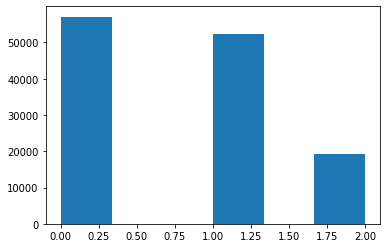

In [12]:
plt.hist(clusters,bins=6)

In [13]:
from collections import Counter

print('cantidad de pixeles por clase')
dict(Counter(clusters).items())

cantidad de pixeles por clase


{0: 57088, 1: 52412, 2: 19356}

Los pixeles en el espacio RGB:

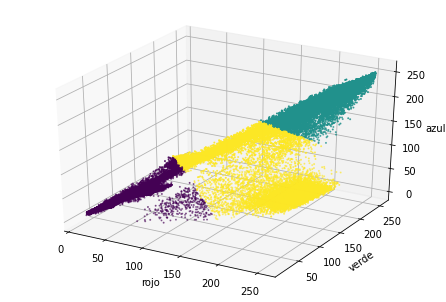

In [14]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=clusters, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

Ejercicio: encuentre 4 o 5 clases con k-medias(no supervisado) 

La cantidad de clusters/clases es un hiper parámetro del modelo

**Ahora con Otra imagen**

(359, 479, 3)
dimensiones de la imagen:  (359, 479, 3) es decir:  171961 = 359 x 479  pixeles RGB
tipo de datos:  uint8


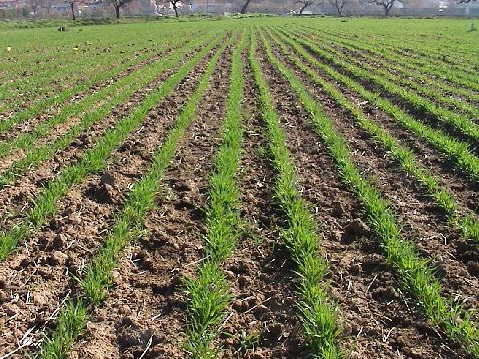

In [15]:
campo_cv=cv2.imread('pics/Campo.png')
print(campo_cv.shape)
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv #otra forma de pasar de BGR a RGB' 
print('dimensiones de la imagen: ', campo.shape, 'es decir: ', campo.shape[0]*campo.shape[1], '=', campo.shape[0],'x',campo.shape[1],' pixeles RGB')
print('tipo de datos: ', campo.dtype)
cv2_imshow(campo_cv)

In [16]:
plt.imshow(campo)
print('componente roja(R) del pixel (0,0):', campo[0,0,0])
print('componente verde(G) del pixel (0,0):', campo[0,0,1])
plt.show()

componente roja(R) del pixel (0,0): 186
componente verde(G) del pixel (0,0): 155


**Pasemos los pixeles a Dataframe**

Tabla de datos con un pixel por fila, en nuestro caso desarmamos la espacialidad, se pierde la ubicación del pixel en la imagen, se pierde la idea de "vecindad"


In [17]:
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=campo[f,c,:]
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head() #miramos las 5 primeras filas de la tabla
      

Tamaño de Base de pixeles: (171961, 4)


pixel_id  rojo  verde  azul
0         0   186    155   161
1         1   202    171   176
2         2   190    159   165
3         3   203    172   177
4         4   189    160   164

In [18]:
df.tail() #miramos las 5 últimas filas de la tabla

pixel_id  rojo  verde  azul
171956    171956    44     48    15
171957    171957    54     58    21
171958    171958    33     39     1
171959    171959    56     64    23
171960    171960    40     51     8

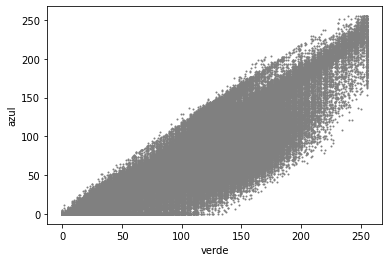

In [19]:
#import matplotlib.patches as mpatches

variables=["rojo","verde","azul"]# variables o características

variable1=variables[1] # puede ser 0, 1 o 2, es decir, rojo, verde o azul
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

Ahora Scatterl plot interactivo, recorra el espacio, cada punto es un pixel en el espacio (r,g,b), graficamos de a dos variables: r y g por ejemplo

In [20]:
import plotly.express as px

fig = px.scatter(df, y=variable2, x=variable1, text="pixel_id")
fig.update_traces(marker_size=2)
#fig.show() #en Jupyter
fig.show(renderer="colab") #En Colab

Ahora las 3 dimensiones: cada pixel es un (r,g,b)

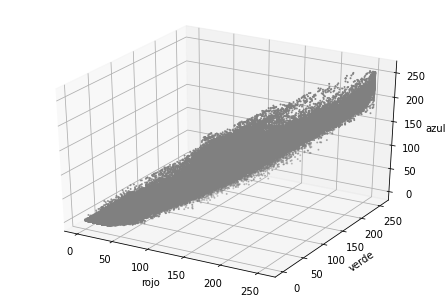

In [21]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

**Clustering** k-Medias (No supervisado)

In [22]:
from sklearn.cluster import KMeans
# Número de clusters buscado:
n_clust = 3
df_km = pd.DataFrame(data0[:,1:4], columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

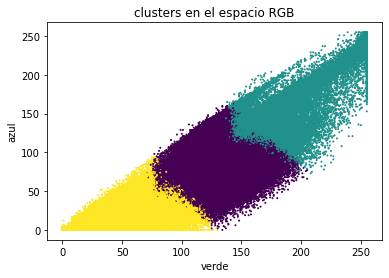

In [23]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

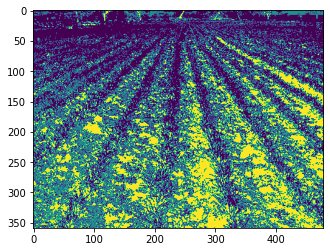

In [24]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters)
#plt.colorbar()
plt.show()

# Clasificación supervisada-semisupervisada

### Semi supervisado: Etiquetado de algunos pixeles: 
**Selección de cada ROI (Region of interest/Regiones de interés)**



entrenamiento.png

### k-nearest neibours -- k-vecinos más cercanos

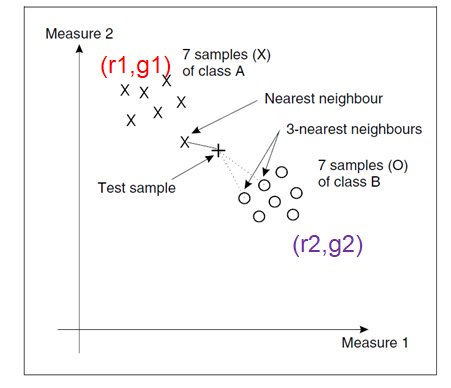

In [25]:
plt.imshow(campo)
plt.show()

Ahora etiquetaremos manualmente algunos de los pixeles


In [26]:
roi1=(136, 241, 47, 106)#suelo
roi2=(192, 269, 33, 56) #pasto
roi3=(145, 1, 121, 14)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')

En cada ROI se guarda: (columna, fila, anchocol, anchofila)


In [27]:
rois=[roi1,roi2,roi3]

Dibujamos la imagen campo con las *regiones rois* elegidas

In [28]:
campo_rois=campo.copy()

for i in range(3):
  #ahora esta armando la "cajita" que tiene esquina en (columna,fila)
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  campo_rois[f1:ff,c1:cf,i]=255 #aca a la "cajita" del roi1 le da color rojo, a la "cajita" del roi2 le da color verde
  #a la "cajita" del roi3 le da color azul

plt.imshow(campo_rois)
plt.show()
print('Zonas etiquetadas-> Rosa: suelo, Verde: pasto, Celeste: fondo')

Zonas etiquetadas-> Rosa: suelo, Verde: pasto, Celeste: fondo


Ahora lo que hacemos es hacer el data frame de los pixeles etiquetados (que son muuuuchos menos)

In [29]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=campo[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()



8524
(8524, 5)
Base de pixeles etiquetados:


pixel_id  rojo  verde  azul  etiqueta
0    115575   101    104    77         1
1    115576   111    110    90         1
2    115577   104     97    89         1
3    115578    34     26    23         1
4    115579    29     22    16         1

**Graficamos los pixeles etiquetados (roi1,2 y 3: entrenamiento)**

cantidad de muestras etiquetadas: 8524
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


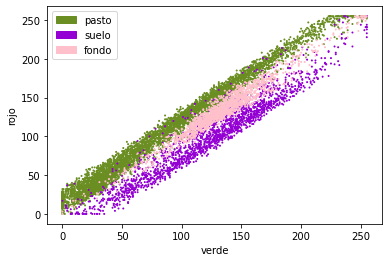

In [30]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

In [31]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0   186    155   161         0
1         1   202    171   176         0
2         2   190    159   165         0
3         3   203    172   177         0
4         4   189    160   164         0
163437
171961
proporción de datos etiqueados: 0.049569379103401354


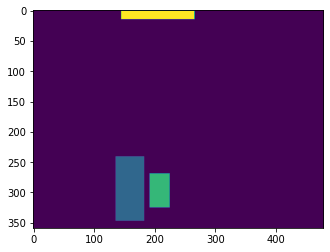

In [32]:
#Base completa con etiquetas y no etiquetados en 0
a=campo.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

**Entrenamos un modelo k-Nearest Neighbor con los pixeles que etiquetamos  (roi1, 2 y 3)** 

con Scikit Learn Elegimos el valor de k=5 (5 vecinos, es un hiper-parámetro)

In [33]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.97


### Clasificación

Clasifiquemos la imagen completa: Se clasifican todos usando el modelo entrenado

(359, 479, 3)
[2]


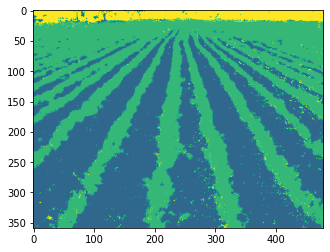

In [34]:
a=campo.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([campo[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.show()        

#### Mejora de la clasificación: co-learning/training

Usando conocimiento de dominio: en imágenes, por ejemplo, la información espacial

* Filtro o algoritmo de modas (puede ser iterado)
* Moda: es el valor más repetido

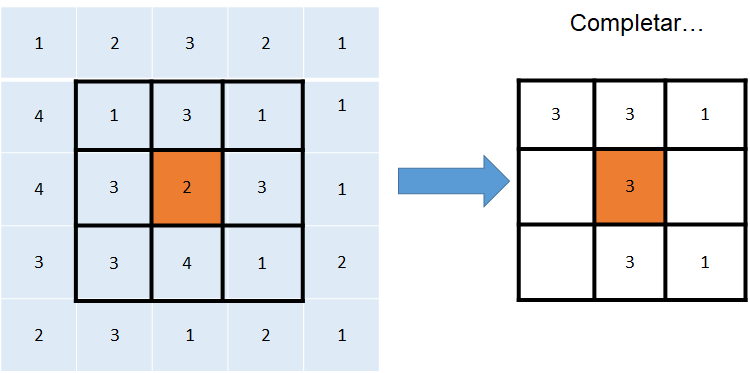

In [35]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)        

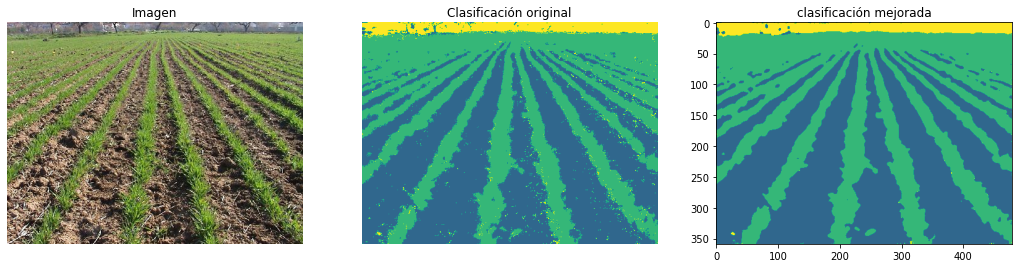

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(campo)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

**Ejercicio: realizar el mismo procedimiento (etiquetado, entrenamiento y clasificación) para daisy.jpg** Puede ser en otra ntb

1º Etiquetado-> Elegir 3 rois: petalos, centro y fondo

2º Entrenar

3º Clasificar





### Opcional: Asignación progresiva

continuación de campo...

In [37]:
n_neighbors = 6
#data_rgb=data[:,1:4]
knn6 = KNeighborsClassifier(n_neighbors)
knn6.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn6.score(data_rgb, target)))


Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.97


**Utilizamos algún criterio para incrementar la muestra de entrenamiento de manera progresiva**

Elegimos comparar 5 vecinos con 6 vecinos, si coincide lo agrega a la muestra de entrenamiento. 

datos sin etiquetar: 2638
proporción de datos sin etiquetar: [0.015340687714074703]


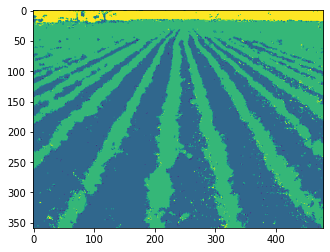

In [38]:
##loop 1
prop=[]
r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('datos sin etiquetar:',(sum(df_completo.etiqueta==0)))     

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)
        

**Se entrena de nuevo los clasificadores con las muetras de entrenamiento actualizadas** y se usa el mismo criterio para etiquetar nuevos datos

comparar knn 5 vecinos con knn 6 vecinos, si coincide lo agrega a la muestra de entrenamiento y así siguiendo... 

datos sin etiquetar: 222
proporción de datos sin etiquetar: [0.015340687714074703, 0.0012909903989858165]


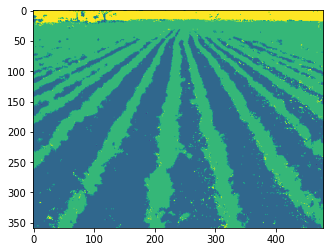

In [39]:
##loop 2
data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
target=df_completo.etiqueta[df_completo.etiqueta!=0]
knn.fit(data_rgb, target)
knn6.fit(data_rgb, target)

r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('datos sin etiquetar:',sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)
        

de datos sin etiquetar: 68
proporción de datos sin etiquetar: [0.015340687714074703, 0.0012909903989858165, 0.0003954385005902501]


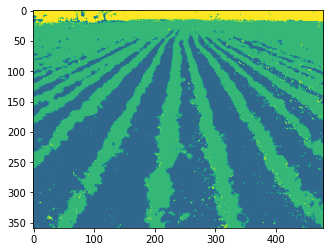

In [40]:
##loop 3
data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
target=df_completo.etiqueta[df_completo.etiqueta!=0]
knn.fit(data_rgb, target)
knn6.fit(data_rgb, target)

r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)

de datos sin etiquetar: 58
proporción de datos sin etiquetar: [0.015340687714074703, 0.0012909903989858165, 0.0003954385005902501, 0.00033728577991521335]


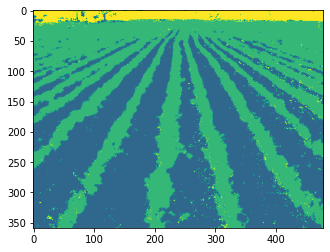

In [41]:
##loop 4
data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
target=df_completo.etiqueta[df_completo.etiqueta!=0]
knn.fit(data_rgb, target)
knn6.fit(data_rgb, target)

r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)

de datos sin etiquetar: 52
proporción de datos sin etiquetar: [0.015340687714074703, 0.0012909903989858165, 0.0003954385005902501, 0.00033728577991521335, 0.0003023941475101913]


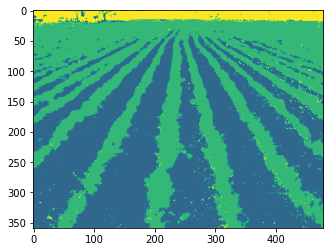

In [42]:
##loop 5
data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
target=df_completo.etiqueta[df_completo.etiqueta!=0]
knn.fit(data_rgb, target)
knn6.fit(data_rgb, target)

r1s= knn.predict(data0[:,1:4])
r2s= knn6.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))        

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)        
plt.imshow(clasif_iter)

**Si no se tuvieron buenos resultados puede ser por muchos motivos:**
* el algoritmo puede fallar y no converger a los aglomerados 
* las características consideradas no son suficientes o no son las adecuadas, por ejemplo.